# Proyecto Final
## Oscar Chavez


In [716]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [1056]:
class regressions():
    def __init__(self, seleccion):
        data=np.load('proyecto_training_data.npy')
        entrenamiento = data[0: int(len(data) * .8)]
        validacion = data[int(len(data) * .8):len(data)]

        df1 = pd.DataFrame(data, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
        df1.describe()
        cols = df1.columns
        for col in cols:
            sns.displot(df1[col])
        corr_list=df1.corr()['SalePrice'].tail(5)
        print(cols[-5:])
        for col in cols[-5:]:
            plt.title('Correlation between Sale Prices and {},\ncoefficient = {}'.format(col,corr_list[col]))
            plt.xlabel(col)
            plt.ylabel('SalePrice')
            plt.scatter(df1[col],df1['SalePrice'])
            plt.show()
        selected_var = corr_list.sort_values(ascending=False).head(2).index
        if seleccion == 1:
            self.name = selected_var[0]
            print("La variable seleccionada es: {}".format(selected_var[0]))
            self.xentrenamiento=entrenamiento[:,1].reshape(-1, 1)
            self.xvalidacion=validacion[:,1].reshape(-1, 1)
        else:
            self.name = selected_var[1]
            print("La variable seleccionada es: {}".format(selected_var[1]))
            self.xentrenamiento=entrenamiento[:,2].reshape(-1, 1)  
            self.xvalidacion=validacion[:,2].reshape(-1, 1)  
        
        self.betas = np.array([[0],[0]])
        self.yentrenamiento = entrenamiento[:,0].reshape(-1, 1)
        self.yvalidacion = validacion[:,0].reshape(-1, 1)

           
    def entrenar_mod_manual(self,epochs, imprimir_error_cada, lrate):  
        x = self.xentrenamiento
        y = self.yentrenamiento
        vect1 = np.ones_like(x).reshape(-1, 1)
        x1 = np.hstack([x, vect1])
        error = 0
        error_list = []
        B_dic = {}
        for aux in range (1, epochs+1):
            yhat = np.matmul(x1, self.betas)
            #print("yhat")
            #print(yhat)
            error = y - yhat
            #print('y-yhat')
            #print(error)
            error = np.power(error,2)
            error = error.sum()
            error = error / (len(y))
            error_list.append(error)
            if(aux ==1):  # Comentar si no se quiere ver la primera iteracion
                print('Primera iteracion')
                print('Error: {}'.format(error))
            if (aux % imprimir_error_cada == 0):
                print('Iteracion: {}'.format(aux))
                print('Error: {}'.format(error))
            GEB = y - yhat
            GEB = GEB*x1
            #print('GEB * x1')
            #print(GEB)
            GEB = GEB.sum(axis=0)
            GEB = (-2) * GEB / len(x)

            #print('betas old')
            #print(betas)
            self.betas = self.betas - lrate * GEB.reshape(-1,1)
            B_dic[aux] = self.betas
            #print('betas new')
            #print(betas)
            #print("")
        return error_list, B_dic
    
    def entrenar_mod_auto(self):
        lm = LinearRegression()
        lm.fit(self.xentrenamiento,self.yentrenamiento)
        return lm_1.coef_, lm_1.intercept_
       
    def vis_error(self, errores):
        plt.plot(errores, color='r')
        plt.title("Error en cada iteracion")
        plt.xlabel("iteracion")
        plt.ylabel("error");
        plt.xlim([-10, 500])
    
    def vis_modelo(self,param,n):
        subs = []
        subs.append(1)   # Comentar si no se quiere ver la primera aproximacion 
        for aux in range(1,len(param)+1):
            if(aux % n)==0:
                subs.append(aux)
        new_param=dict((k, param[k]) for k in subs)
       # print(subs)
        plt.scatter(df1[self.name],df1['SalePrice'])
        for aux in subs:
            x = np.linspace(df1[self.name].min(),df1[self.name].max(),100)
            y = new_param[aux][0].sum()*x+new_param[aux][1].sum()
            plt.plot(x, y, '-r', label=str(aux))

            plt.title('aproximacion del modelo')
            plt.xlabel('x', color='#1C2833')
            plt.ylabel('y', color='#1C2833')
            #plt.legend(loc='upper left')
            plt.grid()
            #plt.show()
    def predecir(self, x, betas_auto):
        betas_auto = np.array([[betas_auto[0].sum()],[betas_auto[1].sum()]])
        betas_prom = np.array([[(betas_auto[0].sum()+test1.betas[0].sum())/2],[(betas_auto[1].sum()+test1.betas[1].sum())/2]])
        vect1 = np.ones_like(x).reshape(-1, 1)
        x = np.hstack([x, vect1])
        pred_manual = np.matmul(x, self.betas)
        pred_auto = np.matmul(x, betas_auto)
        pred_prom = np.matmul(x, betas_prom)
        print("Betas con el modelo entrenado manualmente:")
        print(self.betas)
        print("Betas con el modelo de scikit-learn")
        print(betas_auto)
        print("Betas promediadas")
        print(betas_prom)
        return pred_manual, pred_auto, pred_prom
        

Index(['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], dtype='object')


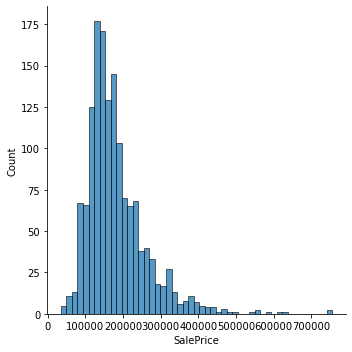

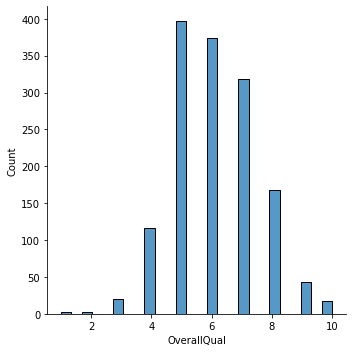

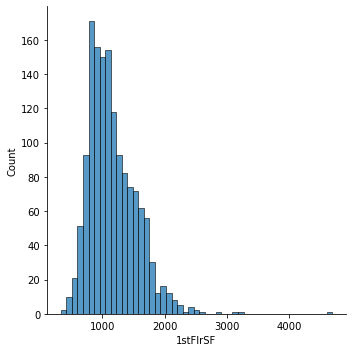

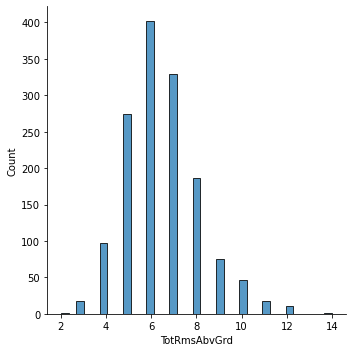

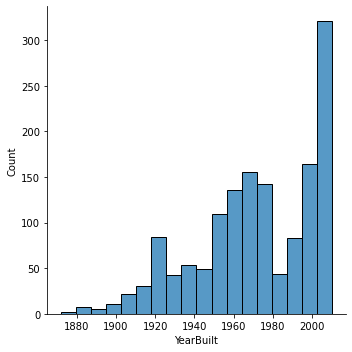

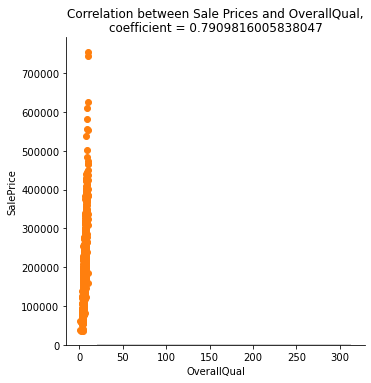

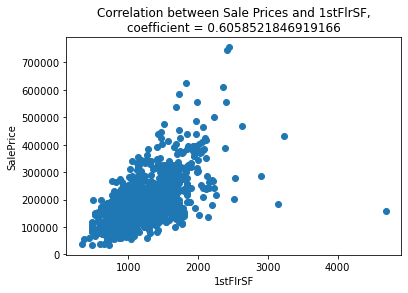

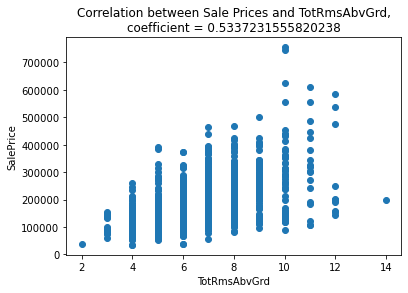

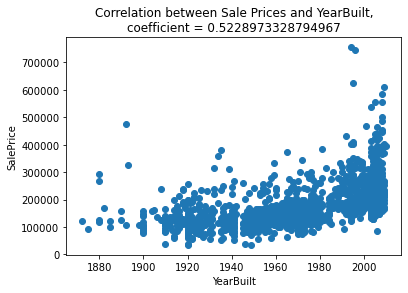

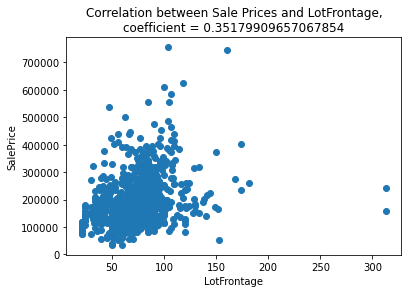

La variable seleccionada es: OverallQual


In [1057]:
test1 = regressions(1)

In [1058]:
test1.__dict__

{'name': 'OverallQual',
 'xentrenamiento': array([[7.],
        [6.],
        [7.],
        ...,
        [7.],
        [8.],
        [6.]]),
 'xvalidacion': array([[ 6.],
        [10.],
        [ 6.],
        [ 6.],
        [ 7.],
        [ 5.],
        [ 6.],
        [ 8.],
        [ 5.],
        [ 6.],
        [ 5.],
        [ 5.],
        [ 7.],
        [ 8.],
        [10.],
        [ 5.],
        [ 5.],
        [ 5.],
        [ 3.],
        [ 8.],
        [ 7.],
        [ 7.],
        [ 4.],
        [ 8.],
        [ 5.],
        [ 6.],
        [ 6.],
        [ 6.],
        [ 7.],
        [ 7.],
        [ 7.],
        [ 4.],
        [ 4.],
        [ 7.],
        [ 5.],
        [ 7.],
        [ 5.],
        [ 7.],
        [ 4.],
        [ 6.],
        [ 5.],
        [ 8.],
        [ 6.],
        [ 8.],
        [ 4.],
        [ 4.],
        [ 5.],
        [ 5.],
        [ 6.],
        [ 8.],
        [ 4.],
        [ 6.],
        [ 5.],
        [ 5.],
        [ 6.],
        [ 5.],
    

In [1059]:
A = test1.entrenar_mod_manual(200000, 50000, 0.0002)
errores = A[0]
param = A[1]

Primera iteracion
Error: 38819444106.4435
Iteracion: 50000
Error: 2368429707.7466774
Iteracion: 100000
Error: 2305057980.432331
Iteracion: 150000
Error: 2295521680.148955
Iteracion: 200000
Error: 2294086639.2095847


In [1060]:
test1.betas

array([[ 45054.53451499],
       [-94180.28016349]])

In [1061]:
param[200000]

array([[ 45054.53451499],
       [-94180.28016349]])

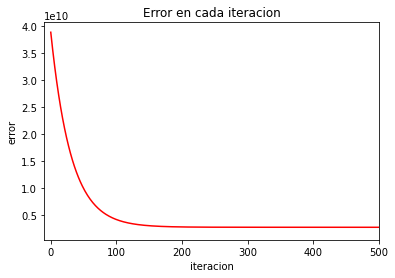

In [1062]:
test1.vis_error(errores)

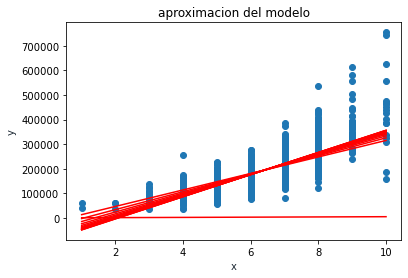

In [1063]:
test1.vis_modelo(param,15000)

In [1068]:
a=np.array([[1],[1],[1],[1]])
prueba = test1.predecir(a,test1.entrenar_mod_auto())
prueba

Betas con el modelo entrenado manualmente:
[[ 45054.53451499]
 [-94180.28016349]]
Betas con el modelo de scikit-learn
[[ 45411.99877916]
 [-96469.57131874]]
Betas promediadas
[[ 45233.26664707]
 [-95324.92574111]]


(array([[-49125.7456485],
        [-49125.7456485],
        [-49125.7456485],
        [-49125.7456485]]),
 array([[-51057.57253958],
        [-51057.57253958],
        [-51057.57253958],
        [-51057.57253958]]),
 array([[-50091.65909404],
        [-50091.65909404],
        [-50091.65909404],
        [-50091.65909404]]))

In [795]:
data=np.load('proyecto_training_data.npy') 
data.shape

(1460, 6)

In [796]:
# 2. Usando sclicing con NumPy separar los datos en 2 datasets:
#entrenamiento(80% de los datos) y validacion y pruebas(20 %).

entrenamiento = data[0: int(len(data) * .8)]
print(entrenamiento.shape)
validacion = data[int(len(data) * .8):len(data)]
print(validacion.shape)
print((entrenamiento.shape[0]+validacion.shape[0])==data.shape[0])

(1168, 6)
(292, 6)
True


In [797]:
# 3. Analisis exploratorio de datos: Para cada variable en el dataset calcular

df1 = pd.DataFrame(data, columns=['SalePrice', 'OverallQual', 
                                           '1stFlrSF', 'TotRmsAbvGrd', 
                                           'YearBuilt', 'LotFrontage'])

print("media")
print(df1.mean())
print("\nvalor maximo")
print(df1.max())
print("\nvalor mınimo")
print(df1.min())
print("\nrango")
print(df1.max()-df1.min())
print("\ndesviacion estandar")
print(df1.std())


media
SalePrice       180921.195890
OverallQual          6.099315
1stFlrSF          1162.626712
TotRmsAbvGrd         6.517808
YearBuilt         1971.267808
LotFrontage         70.049958
dtype: float64

valor maximo
SalePrice       755000.0
OverallQual         10.0
1stFlrSF          4692.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

valor mınimo
SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1872.0
LotFrontage        21.0
dtype: float64

rango
SalePrice       720100.0
OverallQual          9.0
1stFlrSF          4358.0
TotRmsAbvGrd        12.0
YearBuilt          138.0
LotFrontage        292.0
dtype: float64

desviacion estandar
SalePrice       79442.502883
OverallQual         1.382997
1stFlrSF          386.587738
TotRmsAbvGrd        1.625393
YearBuilt          30.202904
LotFrontage        24.284752
dtype: float64


In [798]:
df1.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


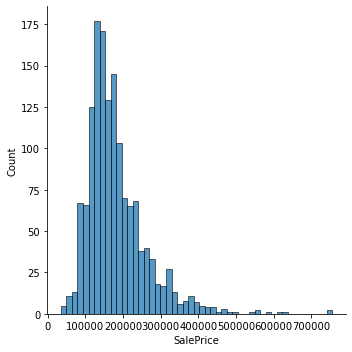

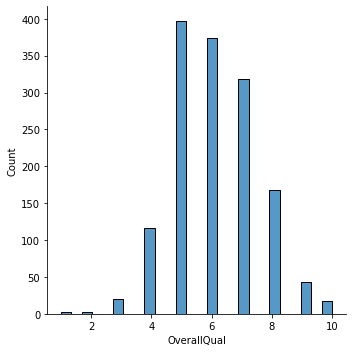

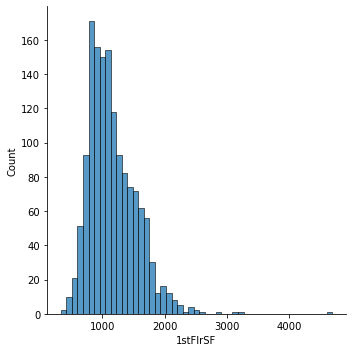

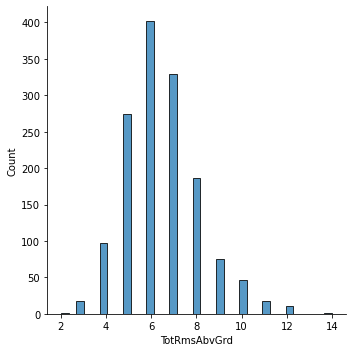

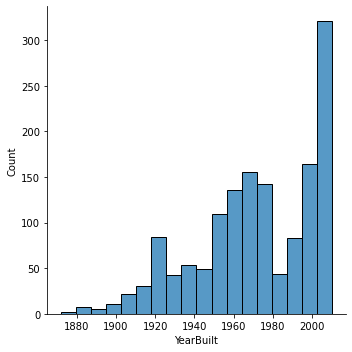

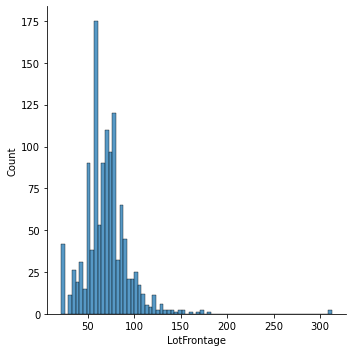

In [799]:
# 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.

cols = df1.columns

for col in cols:
    sns.displot(df1[col])


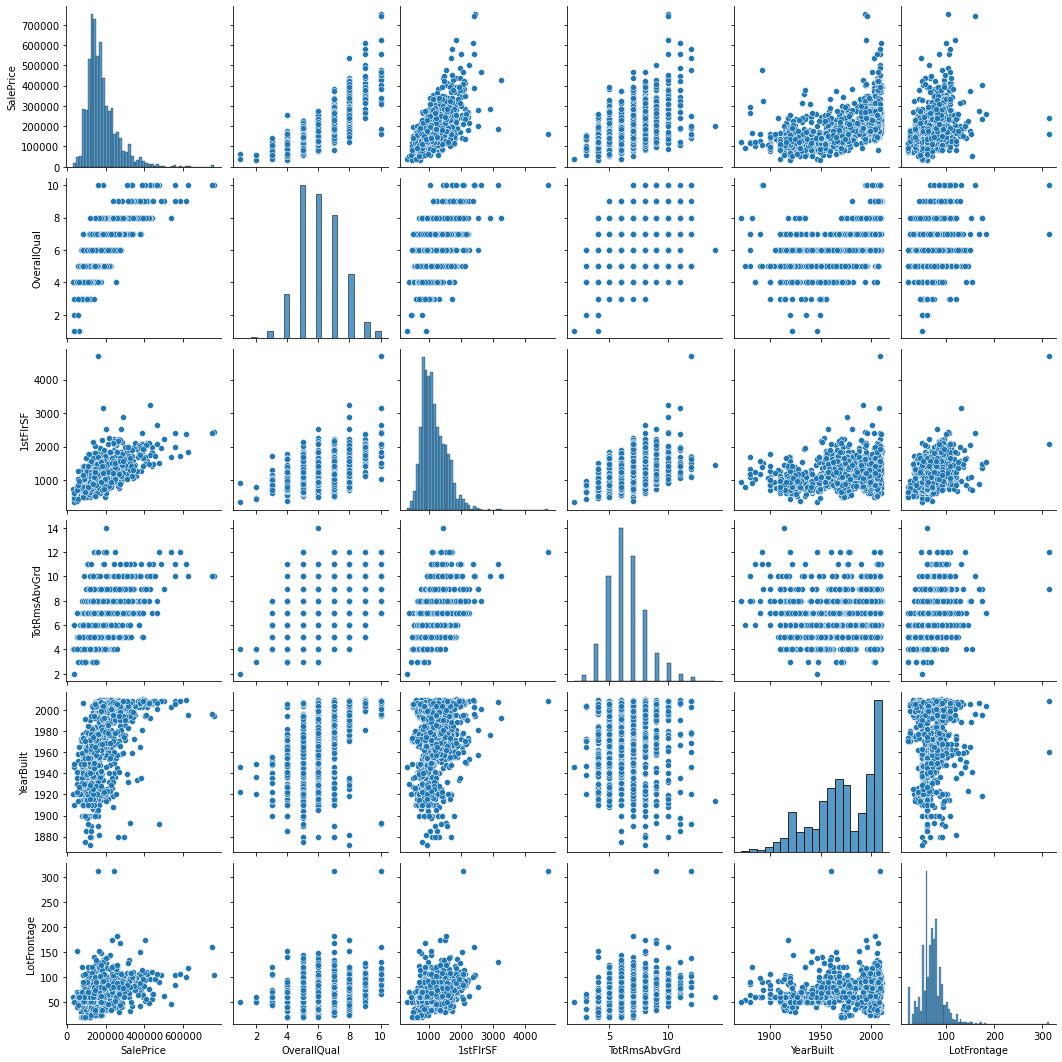

In [800]:
sns.pairplot(df1);

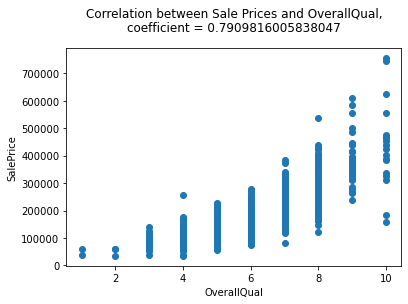

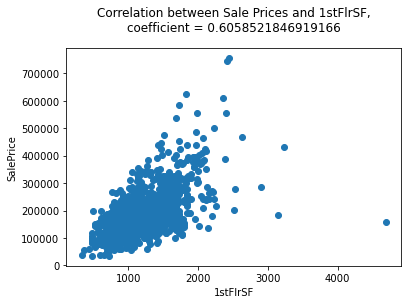

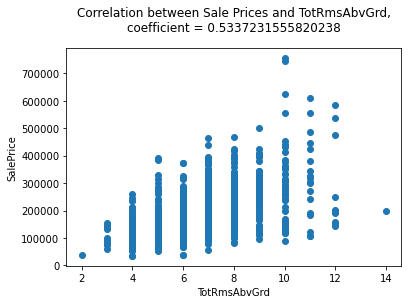

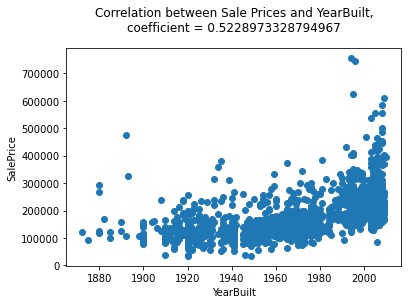

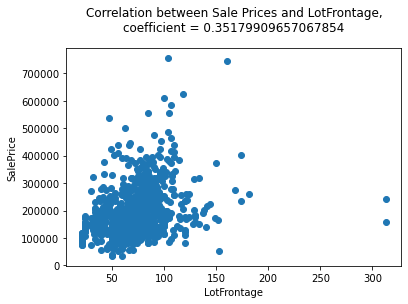

Las 2 variables seleccionadas por mayor correlacion son: OverallQual y 1stFlrSF


In [801]:
# 5. Para cada variable independiente x :
# Calcular el coeficiente de correlaci´on entre x y y.
# Graficar x vs y(scatterplot) usando matplotlib.
# Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.

corr_list=df1.corr()['SalePrice'].tail(5)
for col in cols[-5:]:
    plt.title('Correlation between Sale Prices and {},\ncoefficient = {}'.format(col,corr_list[col]),y=1.05)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.scatter(df1[col],df1['SalePrice'])
    plt.show()

#Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables
#con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion
#entre dicha variable y la variable dependiente.

selected_var = corr_list.sort_values(ascending=False).head(2).index
print("Las 2 variables seleccionadas por mayor correlacion son: {} y {}".format(selected_var[0],selected_var[1]))

In [568]:
# 6. Crear una funci´on para entrenar un modelo de regresi´on lineal de una variable y = β0 +β1 ∗x

def entrenar(x, y, epochs, imprimir_error_cada, lrate):
    betas = np.array([[0],[0]]) #B1=0 y B0=0
    vect1 = np.ones_like(x).reshape(-1, 1)
    x1 = np.hstack([x, vect1])
    error = 0
    error_list = []
    B_dic = {}
    for aux in range (1, epochs+1):
        yhat = np.matmul(x1, betas)
        #print("yhat")
        #print(yhat)
        error = y - yhat
        #print('y-yhat')
        #print(error)
        error = np.power(error,2)
        error = error.sum()
        error = error / (len(y))
        error_list.append(error)
        if(aux ==1):
            print('Primera iteracion')
            print('Error: {}'.format(error))
        if (aux % imprimir_error_cada == 0):
            print('Iteracion: {}'.format(aux))
            print('Error: {}'.format(error))
        GEB = y - yhat
        GEB = GEB*x1
        #print('GEB * x1')
        #print(GEB)
        GEB = GEB.sum(axis=0)
        GEB = (-2) * GEB / len(x)

        #print('betas old')
        #print(betas)
        betas = betas - lrate * GEB.reshape(-1,1)
        B_dic[aux] = betas
        #print('betas new')
        #print(betas)
        #print("")
    return error_list, B_dic

In [745]:
#a=np.array([[2],[4],[6],[9]])
#b=np.array([[4],[10],[14],[1]])
#regresa una tuple
a=entrenar(entrenamiento[:,1].reshape(-1, 1),entrenamiento[:,0].reshape(-1, 1),200000,50000,0.0002)
errores = a[0]
param = a[1]
#entrenar(a,b,4,1,0.01)
#print(np.reshape(df1['SalePrice'].to_list(), (-1, 1)))
print(param[200000])

Primera iteracion
Error: 38819444106.4435
Iteracion: 50000
Error: 2368429707.7466774
Iteracion: 100000
Error: 2305057980.432331
Iteracion: 150000
Error: 2295521680.148955
Iteracion: 200000
Error: 2294086639.2095847
[[ 45054.53451499]
 [-94180.28016349]]


In [754]:
b=entrenar(entrenamiento[:,2].reshape(-1, 1),entrenamiento[:,0].reshape(-1, 1),200000,50000,0.0000001)
errores2 = b[0]
param2 = b[1]


Primera iteracion
Error: 38819444106.4435
Iteracion: 50000
Error: 3936021982.668646
Iteracion: 100000
Error: 3935858098.969803
Iteracion: 150000
Error: 3935694524.8208494
Iteracion: 200000
Error: 3935531259.637095


In [770]:
print(param2[200000])

[[153.60744522]
 [114.56821661]]


In [769]:
df1['1stFlrSF'].to_clipboard()

In [886]:

def vis_error(errores):
    plt.plot(errores, color='r')
    plt.title("Error en cada iteracion")
    plt.xlabel("iteracion")
    plt.ylabel("error");
    plt.xlim([-10, 500])



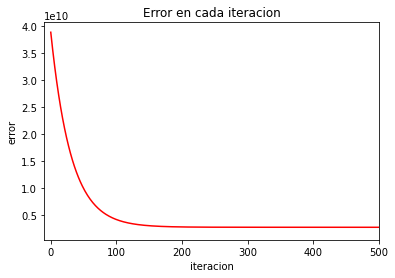

In [989]:
vis_error(errores)

[1, 15000, 30000, 45000, 60000, 75000, 90000, 105000, 120000, 135000, 150000, 165000, 180000, 195000]


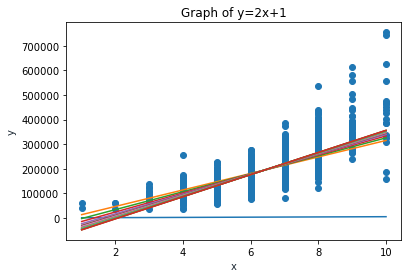

In [988]:
subs = []
subs.append(1)
n=15000
for aux in range(1,len(param)+1):
    if(aux % n)==0:
        subs.append(aux)
new_param=dict((k, param[k]) for k in subs)
print(subs)
plt.scatter(df1[test1.name],df1['SalePrice'])

for aux in subs:
    x = np.linspace(df1[test1.name].min(),df1[test1.name].max(),100)
    y = new_param[aux][0].sum()*x+new_param[aux][1].sum()
    plt.plot(x, y)
    
    plt.title('Graph of y=2x+1')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    #plt.legend(loc='upper left')
    plt.grid()
    #plt.show()

In [ ]:
entrenar(entrenamiento[:,1].reshape(-1, 1),entrenamiento[:,0].reshape(-1, 1),100000,50000,0.001)


[[45411.99877916]]
[-96469.57131874]


[[129.95124229]]
[30324.58517496]
